# Classification results: comparison between FSs

### 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, shapiro, wilcoxon
from functions import Classifier_calculate_metrics_FINAL2, clean_column_names, load_and_prepare_data, select_features_by_anova, select_features_by_pearson, get_dataframe_with_selected_features

X, y = load_and_prepare_data()
y_categorized = np.where(y.ravel() >= 90, 0, 1)
X.head()

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd1 Lactate Concentration,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,y
0,0.725,0.213793,0.88,0.19007,1.047261,-0.040354,1.005,0.810945,1.820,-0.144394,...,14.025,2.090,17.780,5.935,9.1800,3.895,9.8750,0.635,7.555,75.7
1,0.650,0.384615,0.90,0.19007,1.071063,0.246426,1.335,0.749064,2.335,-0.144394,...,13.350,2.165,17.105,12.510,9.5200,4.470,10.1450,1.010,2.910,75.0
2,0.880,0.022727,0.90,0.19007,1.071063,-0.038338,1.030,0.611650,1.660,-0.144394,...,13.670,1.775,19.050,7.210,9.0275,4.415,10.2700,0.000,6.745,55.6
3,0.785,0.363057,1.07,0.19007,1.273374,-0.462059,0.685,0.510949,1.035,-0.144394,...,11.955,0.995,16.430,14.295,8.9950,5.155,10.2550,2.270,2.135,57.7
4,0.410,0.975610,0.81,0.19007,0.963956,1.778134,2.678,-0.002987,2.670,-0.376404,...,11.300,15.100,16.425,14.455,9.5475,1.700,0.0175,1.610,1.065,63.0


In [2]:
num_sufficient_samples = X[X['y'] >=90].shape[0]
num_insuff_samples = X.shape[0] - num_sufficient_samples
scale_pos_weight_1 = num_insuff_samples/num_sufficient_samples

### 2. Definition of feature sets

In [3]:
# Pearson
print('Pearson correlation:')
cols_PearsonCorr = select_features_by_pearson(X)

# ANOVA
print('ANOVA correlation:')
cols_ANOVACorr = select_features_by_anova(X, y)

Pearson correlation:
Number of variables with p-value <= 0.005: 9
ANOVA correlation:
Number of variables with p-value <= 0.05: 15


- Definition of datasets with selected features

In [4]:
# Feature set from study by Williams et al. (2020)
X_FS1_RF = get_dataframe_with_selected_features(X=X, feature_set_name='FS1_RF')

# Feature sets obtained with biclustering analysis
X_CCCB1 = get_dataframe_with_selected_features(X=X, feature_set_name='CCCB1')
X_CCCB1_1 = get_dataframe_with_selected_features(X=X, feature_set_name='CCCB1_1')

X_CCCB2 = get_dataframe_with_selected_features(X=X, feature_set_name='CCCB2')
X_CCCB2_1 = get_dataframe_with_selected_features(X=X, feature_set_name='CCCB2_1')

# Feature sets obtained with correlation coefficients
X_PearsonCorr = X[cols_PearsonCorr]
X_ANOVACorr = X[cols_ANOVACorr]

### 3. Obtain results for X_CCCB2, FS1-RF and ANOVA for all classifiers

In [ ]:
# Define all classifier hyperparameters
model_parameters = {
    'RandomForestClassifier': {
        'CCCB2': {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10},
        'FS1-RF': {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50},
        'ANOVA': {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
    },
    'XGBoostClassifier': {
        'CCCB2': {'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 100, 'reg_lambda': 1, 'scale_pos_weight': scale_pos_weight_1},
        'FS1-RF': {'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 50, 'reg_lambda': 0, 'scale_pos_weight': 1},
        'ANOVA': {'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 100, 'reg_lambda': 1, 'scale_pos_weight': scale_pos_weight_1}
    },
    'Scaler+SVMClassifier': {
        'CCCB2': {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'},
        'FS1-RF': {'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'},
        'ANOVA': {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'linear'}
    },
    'GaussianNaiveBayesClassifier': {
        'CCCB2': {},
        'FS1-RF': {},
        'ANOVA': {}
    },
    'DecisionTreeClassifier': {
        'CCCB2': {'max_depth': None, 'min_samples_split': 10},
        'FS1-RF': {'max_depth': None, 'min_samples_split': 15},
        'ANOVA': {'max_depth': None, 'min_samples_split': 15}
    }
}

In [6]:
X_ANOVACorr = clean_column_names(X_ANOVACorr)

feature_sets = {
    'CCCB2': X_CCCB2,
    'FS1-RF': X_FS1_RF,
    'ANOVA': X_ANOVACorr
}

In [7]:
# Store the results
classification_results = {}

for fs_name, X_data in feature_sets.items():
    print(f'\nResults for FS {fs_name}\n')
    classification_results[fs_name] = {}

    for model_name, fs_params_dict in model_parameters.items():
        print(f'{model_name.replace("Classifier", " Classifier")}')
        params = fs_params_dict[fs_name]
        
        mean_metrics, std_metrics = Classifier_calculate_metrics_FINAL2(
            model_name,
            X_data,
            y_categorized,
            params,
            'loocv'
        )
        
        classification_results[fs_name][model_name] = {
            'mean': mean_metrics,
            'std': std_metrics
        }
        print()


Results for FS CCCB2

RandomForest Classifier
Accuracy: 0.917
Precision: 0.929
Recall: 0.951
f1 score: 0.940
MCC score: 0.805
Mean AIC score: 162.273 ± 6.648
Mean BIC score: 0.706 ± 0.898

XGBoost Classifier
Accuracy: 0.900
Precision: 0.872
Recall: 1.000
f1 score: 0.932
MCC score: 0.773
Mean AIC score: 2178.350 ± 89.971
Mean BIC score: 0.884 ± 1.253

Scaler+SVM Classifier
Accuracy: 0.800
Precision: 0.837
Recall: 0.878
f1 score: 0.857
MCC score: 0.526
Mean AIC score: 73.595 ± 1.674
Mean BIC score: 0.928 ± 1.166

GaussianNaiveBayes Classifier
Accuracy: 0.650
Precision: 0.857
Recall: 0.585
f1 score: 0.696
MCC score: 0.350
Mean AIC score: 125.268 ± 9.586
Mean BIC score: 3.268 ± 9.586

DecisionTree Classifier
Accuracy: 0.883
Precision: 0.905
Recall: 0.927
f1 score: 0.916
MCC score: 0.727
Mean AIC score: 18.054 ± 19.673
Mean BIC score: 6.121 ± 19.892


Results for FS FS1-RF

RandomForest Classifier
Accuracy: 0.883
Precision: 0.854
Recall: 1.000
f1 score: 0.921
MCC score: 0.734
Mean AIC scor

- Extract the metrics from classification_results

In [8]:
# CCCB2
accuracy_RFC_CCCB2, precision_RFC_CCCB2, recall_RFC_CCCB2, f1_RFC_CCCB2, MCC_RFC_CCCB2, AIC_RFC_CCCB2 = classification_results['CCCB2']['RandomForestClassifier']['mean'][0], classification_results['CCCB2']['RandomForestClassifier']['mean'][1], classification_results['CCCB2']['RandomForestClassifier']['mean'][2], classification_results['CCCB2']['RandomForestClassifier']['mean'][3], classification_results['CCCB2']['RandomForestClassifier']['mean'][4], classification_results['CCCB2']['RandomForestClassifier']['mean'][5]
accuracy_XGBC_CCCB2, precision_XGBC_CCCB2, recall_XGBC_CCCB2, f1_XGBC_CCCB2, MCC_XGBC_CCCB2, AIC_XGBC_CCCB2 = classification_results['CCCB2']['XGBoostClassifier']['mean'][0], classification_results['CCCB2']['XGBoostClassifier']['mean'][1], classification_results['CCCB2']['XGBoostClassifier']['mean'][2], classification_results['CCCB2']['XGBoostClassifier']['mean'][3], classification_results['CCCB2']['XGBoostClassifier']['mean'][4], classification_results['CCCB2']['XGBoostClassifier']['mean'][5]
accuracy_SVMC_CCCB2, precision_SVMC_CCCB2, recall_SVMC_CCCB2, f1_SVMC_CCCB2, MCC_SVMC_CCCB2, AIC_SVMC_CCCB2 = classification_results['CCCB2']['Scaler+SVMClassifier']['mean'][0], classification_results['CCCB2']['Scaler+SVMClassifier']['mean'][1], classification_results['CCCB2']['Scaler+SVMClassifier']['mean'][2], classification_results['CCCB2']['Scaler+SVMClassifier']['mean'][3], classification_results['CCCB2']['Scaler+SVMClassifier']['mean'][4], classification_results['CCCB2']['Scaler+SVMClassifier']['mean'][5]
accuracy_GNBC_CCCB2, precision_GNBC_CCCB2, recall_GNBC_CCCB2, f1_GNBC_CCCB2, MCC_GNBC_CCCB2, AIC_GNBC_CCCB2 = classification_results['CCCB2']['GaussianNaiveBayesClassifier']['mean'][0], classification_results['CCCB2']['GaussianNaiveBayesClassifier']['mean'][1], classification_results['CCCB2']['GaussianNaiveBayesClassifier']['mean'][2], classification_results['CCCB2']['GaussianNaiveBayesClassifier']['mean'][3], classification_results['CCCB2']['GaussianNaiveBayesClassifier']['mean'][4], classification_results['CCCB2']['GaussianNaiveBayesClassifier']['mean'][5]
accuracy_DTC_CCCB2, precision_DTC_CCCB2, recall_DTC_CCCB2, f1_DTC_CCCB2, MCC_DTC_CCCB2, AIC_DTC_CCCB2 = classification_results['CCCB2']['DecisionTreeClassifier']['mean'][0], classification_results['CCCB2']['DecisionTreeClassifier']['mean'][1], classification_results['CCCB2']['DecisionTreeClassifier']['mean'][2], classification_results['CCCB2']['DecisionTreeClassifier']['mean'][3], classification_results['CCCB2']['DecisionTreeClassifier']['mean'][4], classification_results['CCCB2']['DecisionTreeClassifier']['mean'][5]

# FS1-RF
accuracy_RFC_XFS1RF, precision_RFC_XFS1RF, recall_RFC_XFS1RF, f1_RFC_XFS1RF, MCC_RFC_XFS1RF, AIC_RFC_XFS1RF = classification_results['FS1-RF']['RandomForestClassifier']['mean'][0], classification_results['FS1-RF']['RandomForestClassifier']['mean'][1], classification_results['FS1-RF']['RandomForestClassifier']['mean'][2], classification_results['FS1-RF']['RandomForestClassifier']['mean'][3], classification_results['FS1-RF']['RandomForestClassifier']['mean'][4], classification_results['FS1-RF']['RandomForestClassifier']['mean'][5]
accuracy_XGBC_XFS1RF, precision_XGBC_XFS1RF, recall_XGBC_XFS1RF, f1_XGBC_XFS1RF, MCC_XGBC_XFS1RF, AIC_XGBC_XFS1RF = classification_results['FS1-RF']['XGBoostClassifier']['mean'][0], classification_results['FS1-RF']['XGBoostClassifier']['mean'][1], classification_results['FS1-RF']['XGBoostClassifier']['mean'][2], classification_results['FS1-RF']['XGBoostClassifier']['mean'][3], classification_results['FS1-RF']['XGBoostClassifier']['mean'][4], classification_results['FS1-RF']['XGBoostClassifier']['mean'][5]
accuracy_SVMC_XFS1RF, precision_SVMC_XFS1RF, recall_SVMC_XFS1RF, f1_SVMC_XFS1RF, MCC_SVMC_XFS1RF, AIC_SVMC_XFS1RF = classification_results['FS1-RF']['Scaler+SVMClassifier']['mean'][0], classification_results['FS1-RF']['Scaler+SVMClassifier']['mean'][1], classification_results['FS1-RF']['Scaler+SVMClassifier']['mean'][2], classification_results['FS1-RF']['Scaler+SVMClassifier']['mean'][3], classification_results['FS1-RF']['Scaler+SVMClassifier']['mean'][4], classification_results['FS1-RF']['Scaler+SVMClassifier']['mean'][5]
accuracy_GNBC_XFS1RF, precision_GNBC_XFS1RF, recall_GNBC_XFS1RF, f1_GNBC_XFS1RF, MCC_GNBC_XFS1RF, AIC_GNBC_XFS1RF = classification_results['FS1-RF']['GaussianNaiveBayesClassifier']['mean'][0], classification_results['FS1-RF']['GaussianNaiveBayesClassifier']['mean'][1], classification_results['FS1-RF']['GaussianNaiveBayesClassifier']['mean'][2], classification_results['FS1-RF']['GaussianNaiveBayesClassifier']['mean'][3], classification_results['FS1-RF']['GaussianNaiveBayesClassifier']['mean'][4],  classification_results['FS1-RF']['GaussianNaiveBayesClassifier']['mean'][5]
accuracy_DTC_XFS1RF, precision_DTC_XFS1RF, recall_DTC_XFS1RF, f1_DTC_XFS1RF, MCC_DTC_XFS1RF, AIC_DTC_XFS1RF = classification_results['FS1-RF']['DecisionTreeClassifier']['mean'][0], classification_results['FS1-RF']['DecisionTreeClassifier']['mean'][1], classification_results['FS1-RF']['DecisionTreeClassifier']['mean'][2], classification_results['FS1-RF']['DecisionTreeClassifier']['mean'][3], classification_results['FS1-RF']['DecisionTreeClassifier']['mean'][4], classification_results['FS1-RF']['DecisionTreeClassifier']['mean'][5]

# ANOVA
accuracy_RFC_ANOVA, precision_RFC_ANOVA, recall_RFC_ANOVA, f1_RFC_ANOVA, MCC_RFC_ANOVA, AIC_RFC_ANOVA = classification_results['ANOVA']['RandomForestClassifier']['mean'][0], classification_results['ANOVA']['RandomForestClassifier']['mean'][1], classification_results['ANOVA']['RandomForestClassifier']['mean'][2], classification_results['ANOVA']['RandomForestClassifier']['mean'][3], classification_results['ANOVA']['RandomForestClassifier']['mean'][4], classification_results['ANOVA']['RandomForestClassifier']['mean'][5]
accuracy_XGBC_ANOVA, precision_XGBC_ANOVA, recall_XGBC_ANOVA, f1_XGBC_ANOVA, MCC_XGBC_ANOVA, AIC_XGBC_ANOVA = classification_results['ANOVA']['XGBoostClassifier']['mean'][0], classification_results['ANOVA']['XGBoostClassifier']['mean'][1], classification_results['ANOVA']['XGBoostClassifier']['mean'][2], classification_results['ANOVA']['XGBoostClassifier']['mean'][3], classification_results['ANOVA']['XGBoostClassifier']['mean'][4], classification_results['ANOVA']['XGBoostClassifier']['mean'][5]
accuracy_SVMC_ANOVA, precision_SVMC_ANOVA, recall_SVMC_ANOVA, f1_SVMC_ANOVA, MCC_SVMC_ANOVA, AIC_SVMC_ANOVA = classification_results['ANOVA']['Scaler+SVMClassifier']['mean'][0], classification_results['ANOVA']['Scaler+SVMClassifier']['mean'][1], classification_results['ANOVA']['Scaler+SVMClassifier']['mean'][2], classification_results['ANOVA']['Scaler+SVMClassifier']['mean'][3], classification_results['ANOVA']['Scaler+SVMClassifier']['mean'][4], classification_results['ANOVA']['Scaler+SVMClassifier']['mean'][5]
accuracy_GNBC_ANOVA, precision_GNBC_ANOVA, recall_GNBC_ANOVA, f1_GNBC_ANOVA, MCC_GNBC_ANOVA, AIC_GNBC_ANOVA = classification_results['ANOVA']['GaussianNaiveBayesClassifier']['mean'][0], classification_results['ANOVA']['GaussianNaiveBayesClassifier']['mean'][1], classification_results['ANOVA']['GaussianNaiveBayesClassifier']['mean'][2], classification_results['ANOVA']['GaussianNaiveBayesClassifier']['mean'][3], classification_results['ANOVA']['GaussianNaiveBayesClassifier']['mean'][4], classification_results['ANOVA']['GaussianNaiveBayesClassifier']['mean'][5]
accuracy_DTC_ANOVA, precision_DTC_ANOVA, recall_DTC_ANOVA, f1_DTC_ANOVA, MCC_DTC_ANOVA, AIC_DTC_ANOVA = classification_results['ANOVA']['DecisionTreeClassifier']['mean'][0], classification_results['ANOVA']['DecisionTreeClassifier']['mean'][1], classification_results['ANOVA']['DecisionTreeClassifier']['mean'][2], classification_results['ANOVA']['DecisionTreeClassifier']['mean'][3], classification_results['ANOVA']['DecisionTreeClassifier']['mean'][4], classification_results['ANOVA']['DecisionTreeClassifier']['mean'][5]

### 4. Comparison between CCCB2 and FS1-RF

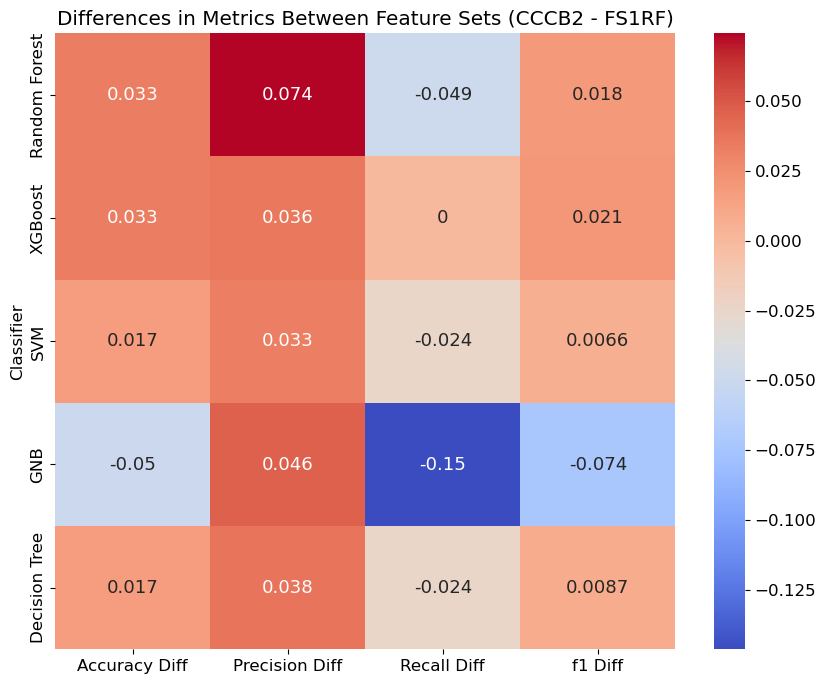

In [ ]:
data = {
    'Classifier': ['Random Forest', 'XGBoost', 'SVM', 'GNB', 'Decision Tree'],
    'Accuracy_FS1_RF': [accuracy_RFC_XFS1RF, accuracy_XGBC_XFS1RF, accuracy_SVMC_XFS1RF, accuracy_GNBC_XFS1RF, accuracy_DTC_XFS1RF],
    'Accuracy_CCCB2': [accuracy_RFC_CCCB2, accuracy_XGBC_CCCB2, accuracy_SVMC_CCCB2, accuracy_GNBC_CCCB2, accuracy_DTC_CCCB2],
    'Precision_FS1_RF': [precision_RFC_XFS1RF, precision_XGBC_XFS1RF, precision_SVMC_XFS1RF, precision_GNBC_XFS1RF, precision_DTC_XFS1RF],
    'Precision_CCCB2': [precision_RFC_CCCB2, precision_XGBC_CCCB2, precision_SVMC_CCCB2, precision_GNBC_CCCB2, precision_DTC_CCCB2],
    'Recall_FS1_RF':[recall_RFC_XFS1RF, recall_XGBC_XFS1RF, recall_SVMC_XFS1RF, recall_GNBC_XFS1RF, recall_DTC_XFS1RF],
    'Recall_CCCB2': [recall_RFC_CCCB2, recall_XGBC_CCCB2, recall_SVMC_CCCB2, recall_GNBC_CCCB2, recall_DTC_CCCB2],
    'f1_score_FS1_RF': [f1_RFC_XFS1RF, f1_XGBC_XFS1RF, f1_SVMC_XFS1RF, f1_GNBC_XFS1RF, f1_DTC_XFS1RF],
    'f1_score_CCCB2': [f1_RFC_CCCB2, f1_XGBC_CCCB2, f1_SVMC_CCCB2, f1_GNBC_CCCB2, f1_DTC_CCCB2],
    'MCC_score_FS1_RF': [MCC_RFC_XFS1RF, MCC_XGBC_XFS1RF, MCC_SVMC_XFS1RF, MCC_GNBC_XFS1RF, MCC_DTC_XFS1RF],
    'MCC_score_CCCB2': [MCC_RFC_CCCB2, MCC_XGBC_CCCB2, MCC_SVMC_CCCB2, MCC_GNBC_CCCB2, MCC_DTC_CCCB2],
    'AIC_FS1_RF': [AIC_RFC_XFS1RF, AIC_XGBC_XFS1RF, AIC_SVMC_XFS1RF, AIC_GNBC_XFS1RF, AIC_DTC_XFS1RF],
    'AIC_CCCB2': [AIC_RFC_CCCB2, AIC_XGBC_CCCB2, AIC_SVMC_CCCB2, AIC_GNBC_CCCB2, AIC_DTC_CCCB2]
}
df = pd.DataFrame(data)

# Compute the differences
diff_data = df.set_index('Classifier')
diff_data['Accuracy Diff'] = diff_data['Accuracy_CCCB2'] - diff_data['Accuracy_FS1_RF']
diff_data['Precision Diff'] = diff_data['Precision_CCCB2'] - diff_data['Precision_FS1_RF']
diff_data['Recall Diff'] = diff_data['Recall_CCCB2'] - diff_data['Recall_FS1_RF']
diff_data['f1 Diff'] = diff_data['f1_score_CCCB2'] - diff_data['f1_score_FS1_RF']
diff_data = diff_data[['Accuracy Diff', 'Precision Diff', 'Recall Diff', 'f1 Diff']]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 8))
sns.heatmap(diff_data, annot=True, cmap='coolwarm', cbar=True, annot_kws={'size': 13})
plt.title('Differences in Metrics Between Feature Sets (CCCB2 - FS1RF)')
plt.show()

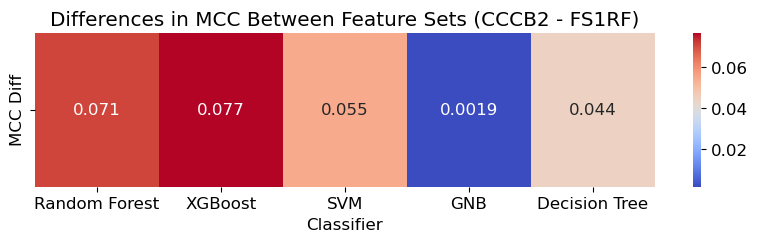

In [10]:
diff_data = df.set_index('Classifier')
diff_data['MCC Diff'] = diff_data['MCC_score_CCCB2'] - diff_data['MCC_score_FS1_RF']
diff_data['AIC Diff'] = diff_data['AIC_CCCB2'] - diff_data['AIC_FS1_RF']
diff_data_MCC = diff_data[['MCC Diff']]
diff_data_MCC = np.transpose(diff_data_MCC)

plt.figure(figsize=(10,2))
sns.heatmap(diff_data_MCC, annot=True, cmap='coolwarm', cbar=True)
plt.title('Differences in MCC Between Feature Sets (CCCB2 - FS1RF)')
plt.show()

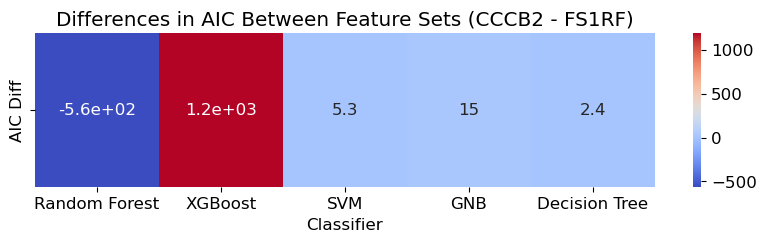

In [11]:
diff_data_AIC = diff_data[['AIC Diff']]
diff_data_AIC = np.transpose(diff_data_AIC)

plt.figure(figsize=(10,2))
sns.heatmap(diff_data_AIC, annot=True, cmap='coolwarm', cbar=True)
plt.title('Differences in AIC Between Feature Sets (CCCB2 - FS1RF)')
plt.show()

- 1. Calculate the Shapiro-Wilk test to check if the differences have a normal distribution
- 2. Calculate the paired Student's t-test for metrics which differences are normally distributed, and the Wilcoxon test otherwise.

In [12]:
metrics = ['Accuracy', 'Precision', 'Recall', 'f1_score', 'MCC_score', 'AIC']
p_values = []

for metric in metrics:
    print(metric)
    # Calculate differences
    differences = diff_data[f'{metric}_CCCB2'] - diff_data[f'{metric}_FS1_RF']
    
    # Shapiro-Wilk test to determine if the differences are normal
    stat, p_shapiro = shapiro(differences)
    print(f"Shapiro-Wilk Test: stat={stat:.3f}, p={p_shapiro:.3f}")
    
    if p_shapiro >= 0.05: # If differences normally distributed
        t_stat, p_value = ttest_rel(diff_data[f'{metric}_CCCB2'], diff_data[f'{metric}_FS1_RF'])
        print(f"T-Test: t-statistic={t_stat:.3f}, p-value={p_value:.3f}")
    else: # if differences are not normally distributed
        stat, p_value = wilcoxon(diff_data[f'{metric}_CCCB2'], diff_data[f'{metric}_FS1_RF'])
        print(f"Wilcoxon Test: stat={stat:.3f}, p-value={p_value:.3f}")
    
    p_values.append(p_value)
    print()

Accuracy
Shapiro-Wilk Test: stat=0.739, p=0.023
Wilcoxon Test: stat=5.000, p-value=0.625

Precision
Shapiro-Wilk Test: stat=0.794, p=0.072
T-Test: t-statistic=5.999, p-value=0.004

Recall
Shapiro-Wilk Test: stat=0.813, p=0.103
T-Test: t-statistic=-1.907, p-value=0.129

f1_score
Shapiro-Wilk Test: stat=0.690, p=0.007
Wilcoxon Test: stat=5.000, p-value=0.625

MCC_score
Shapiro-Wilk Test: stat=0.895, p=0.381
T-Test: t-statistic=3.755, p-value=0.020

AIC
Shapiro-Wilk Test: stat=0.827, p=0.131
T-Test: t-statistic=0.457, p-value=0.672



In [13]:
def compute_mean_metric(*metric_values):
    metric_array = np.array(metric_values)
    return np.mean(metric_array)

In [14]:
# Accuracy calculations
accuracy_XFS1RF_mean = compute_mean_metric(accuracy_RFC_XFS1RF, accuracy_XGBC_XFS1RF, accuracy_SVMC_XFS1RF, accuracy_GNBC_XFS1RF, accuracy_DTC_XFS1RF)
accuracy_CCCB2_mean = compute_mean_metric(accuracy_RFC_CCCB2, accuracy_XGBC_CCCB2, accuracy_SVMC_CCCB2, accuracy_GNBC_CCCB2, accuracy_DTC_CCCB2)
accuracy_ANOVA_mean = compute_mean_metric(accuracy_RFC_ANOVA, accuracy_XGBC_ANOVA, accuracy_SVMC_ANOVA, accuracy_GNBC_ANOVA, accuracy_DTC_ANOVA)

# Precision calculations
precision_XFS1RF_mean = compute_mean_metric(precision_RFC_XFS1RF, precision_XGBC_XFS1RF, precision_SVMC_XFS1RF, precision_GNBC_XFS1RF, precision_DTC_XFS1RF)
precision_CCCB2_mean = compute_mean_metric(precision_RFC_CCCB2, precision_XGBC_CCCB2, precision_SVMC_CCCB2, precision_GNBC_CCCB2, precision_DTC_CCCB2)
precision_ANOVA_mean = compute_mean_metric(precision_RFC_ANOVA, precision_XGBC_ANOVA, precision_SVMC_ANOVA, precision_GNBC_ANOVA, precision_DTC_ANOVA)

# Recall calculations
recall_XFS1RF_mean = compute_mean_metric(recall_RFC_XFS1RF, recall_XGBC_XFS1RF, recall_SVMC_XFS1RF, recall_GNBC_XFS1RF, recall_DTC_XFS1RF)
recall_CCCB2_mean = compute_mean_metric(recall_RFC_CCCB2, recall_XGBC_CCCB2, recall_SVMC_CCCB2, recall_GNBC_CCCB2, recall_DTC_CCCB2)
recall_ANOVA_mean = compute_mean_metric(recall_RFC_ANOVA, recall_XGBC_ANOVA, recall_SVMC_ANOVA, recall_GNBC_ANOVA, recall_DTC_ANOVA)

# f1 score calculations
f1_XFS1RF_mean = compute_mean_metric(f1_RFC_XFS1RF, f1_XGBC_XFS1RF, f1_SVMC_XFS1RF, f1_GNBC_XFS1RF, f1_DTC_XFS1RF)
f1_CCCB2_mean = compute_mean_metric(f1_RFC_CCCB2, f1_XGBC_CCCB2, f1_SVMC_CCCB2, f1_GNBC_CCCB2, f1_DTC_CCCB2)
f1_ANOVA_mean = compute_mean_metric(f1_RFC_ANOVA, f1_XGBC_ANOVA, f1_SVMC_ANOVA, f1_GNBC_ANOVA, f1_DTC_ANOVA)

# MCC calculations
MCC_XFS1RF_mean = compute_mean_metric(MCC_RFC_XFS1RF, MCC_XGBC_XFS1RF, MCC_SVMC_XFS1RF, MCC_GNBC_XFS1RF, MCC_DTC_XFS1RF)
MCC_CCCB2_mean = compute_mean_metric(MCC_RFC_CCCB2, MCC_XGBC_CCCB2, MCC_SVMC_CCCB2, MCC_GNBC_CCCB2, MCC_DTC_CCCB2)
MCC_ANOVA_mean = compute_mean_metric(MCC_RFC_ANOVA, MCC_XGBC_ANOVA, MCC_SVMC_ANOVA, MCC_GNBC_ANOVA, MCC_DTC_ANOVA)

# AIC calculations
AIC_XFS1RF_mean = compute_mean_metric(AIC_RFC_XFS1RF, AIC_XGBC_XFS1RF, AIC_SVMC_XFS1RF, AIC_GNBC_XFS1RF, AIC_DTC_XFS1RF)
AIC_CCCB2_mean = compute_mean_metric(AIC_RFC_CCCB2, AIC_XGBC_CCCB2, AIC_SVMC_CCCB2, AIC_GNBC_CCCB2, AIC_DTC_CCCB2)
AIC_ANOVA_mean = compute_mean_metric(AIC_RFC_ANOVA, AIC_XGBC_ANOVA, AIC_SVMC_ANOVA, AIC_GNBC_ANOVA, AIC_DTC_ANOVA)

### 5. Comparison between representative FSs

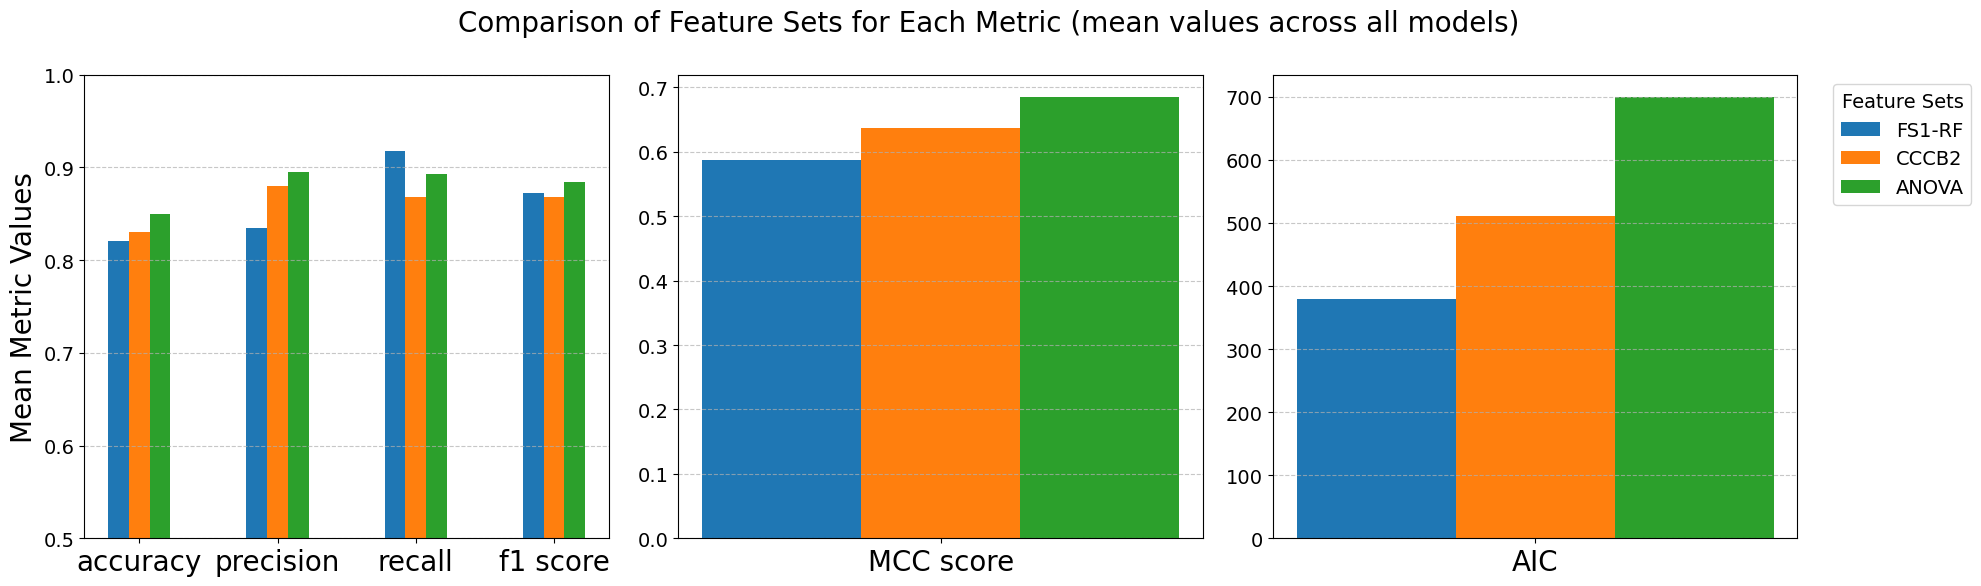

In [15]:
feature_sets = ['FS1-RF', 'CCCB2', 'ANOVA']
metric_values = {
    'accuracy': [accuracy_XFS1RF_mean, accuracy_CCCB2_mean, accuracy_ANOVA_mean],
    'precision': [precision_XFS1RF_mean, precision_CCCB2_mean, precision_ANOVA_mean],
    'recall': [recall_XFS1RF_mean, recall_CCCB2_mean, recall_ANOVA_mean],
    'f1 score': [f1_XFS1RF_mean, f1_CCCB2_mean, f1_ANOVA_mean],
}

metrics = list(metric_values.keys())
x = np.arange(len(metrics))
width = 0.15

plt.rcParams.update({'font.size': 14})
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20, 6))

# Subplot 1: metrics in range (0,1)
for i, feature_set in enumerate(feature_sets):
    values = [metric_values[metric][i] for metric in metrics]
    ax1.bar(x + i * width, values, width, label=feature_set)

ax1.set_ylabel('Mean Metric Values', fontsize = 20)
ax1.set_xticks(x + width * (len(feature_sets) - 1) / 2)
ax1.set_xticklabels(metrics, fontsize = 20)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_ylim(0.5,1)

# Subplot 2: MCC, range (-1,1)
metric_values = {
    'MCC score': [MCC_XFS1RF_mean, MCC_CCCB2_mean, MCC_ANOVA_mean]
}

metrics = list(metric_values.keys())
x = np.arange(len(metrics))
width = 0.15

for i, feature_set in enumerate(feature_sets):
    values = [metric_values[metric][i] for metric in metrics]
    ax2.bar(x + i * width, values, width, label=feature_set)

ax2.set_xticks(x + width * (len(feature_sets) - 1) / 2)
ax2.set_xticklabels(metrics, fontsize = 20)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 3: AIC
metric_values = {
    'AIC': [AIC_XFS1RF_mean, AIC_CCCB2_mean, AIC_ANOVA_mean],
}

metrics = list(metric_values.keys())
x = np.arange(len(metrics))
width = 0.15

for i, feature_set in enumerate(feature_sets):
    values = [metric_values[metric][i] for metric in metrics]
    ax3.bar(x + i * width, values, width, label=feature_set)

ax3.set_xticks(x + width * (len(feature_sets) - 1) / 2)
ax3.set_xticklabels(metrics, fontsize = 20)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.legend(title="Feature Sets", loc='upper left', bbox_to_anchor=(1.05, 1))

fig.suptitle('Comparison of Feature Sets for Each Metric (mean values across all models)', fontsize=20)

plt.tight_layout()
plt.show()